In [3]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from matplotlib import pyplot as plt
import time
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.ndimage.measurements import label
import time
import pickle

from moviepy.editor import VideoFileClip
from IPython.display import HTML

from src.search import *
from src.preprocessing import *
from src.train import *

%matplotlib inline

# Search Pipeline
YSTART = 400
YSTOP = 656
ORIENT = 9
PIX_PER_CELL=8
CELL_PER_BLOCK=2
HOG_CHANNEL = [0,1,2]
VEHICLE_IMG_FOLDER, NONVEHICLE_IMG_FOLDER = "training_images/vehicles", "training_images/non-vehicles"

## Training Pipeline

In [19]:
vehicle_img_path, non_vehicle_img_path = read_images()
print("Retrieved the image paths...")
print("{} images found".format(len(vehicle_img_path) + len(non_vehicle_img_path)))

# HOG Features
nb_samples = 5000
hog_features_vehicles = np.array([create_hog_features(_img) for _img in vehicle_img_path[:nb_samples//2]])
hog_features_non_vehicles = np.array([create_hog_features(_img) for _img in non_vehicle_img_path[:nb_samples//2]])
print("Created HOG Features...")

X = np.vstack((hog_features_vehicles, hog_features_non_vehicles)).astype(np.float64)
y = np.hstack((np.ones(hog_features_vehicles.shape[0]), np.zeros(hog_features_non_vehicles.shape[0])))
train_model(X,y)

Retrieved the image paths...
17760 images found
Created HOG Features...
Model standard_scaler saved..
Test Accuracy of SVC =  0.967
Model linear_svm saved..


In [20]:
assert X.shape[1], 5292

## Search Pipeline 

In [15]:
img = cv2.imread("test_images/test3.jpg")
image_size = img.shape[:2]
detector = Detector(ORIENT, image_size, PIX_PER_CELL, CELL_PER_BLOCK, (400,656))

In [16]:
detector.image = img
detector.find_proposed_regions()
detector.update_heat_map()

29 proposed regions


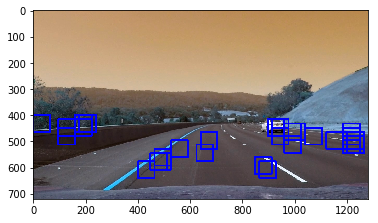

In [17]:
_img = detector.show_proposed_regions()
plt.imshow(_img)

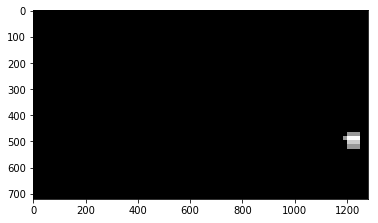

In [18]:
plt.imshow(detector.heatmap,cmap='gray')

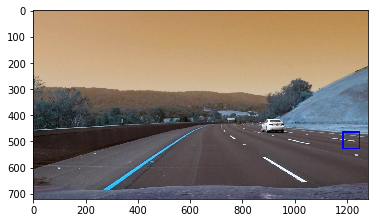

In [20]:
detector.detect()
_img = detector.show_labels()
plt.imshow(_img,cmap='gray')

In [4]:
img = cv2.imread("test_images/test3.jpg")
image_size = img.shape[:2]
detector = Detector(ORIENT, image_size, PIX_PER_CELL, CELL_PER_BLOCK, (400,656))
def process(img, detector):
    return detector.process(img)
fun = lambda x: process(x, detector)

45 proposed regions


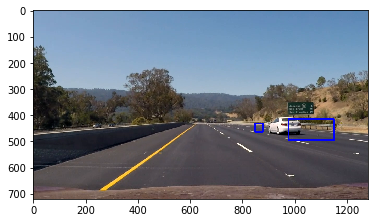

In [5]:
#Video
clip2 = VideoFileClip('project_video.mp4')
img = clip2.get_frame(19)
_img = fun(img)
plt.imshow(_img)

In [ ]:
# Video proccessing
output = 'annotated_project_video.mp4'
clip2 = VideoFileClip('project_video.mp4')
challenge_clip = clip2.fl_image(fun)
%time challenge_clip.write_videofile(output, audio=False)

54 proposed regions
[MoviePy] >>>> Building video annotated_project_video.mp4
[MoviePy] Writing video annotated_project_video.mp4


  0%|          | 1/1261 [00:00<08:31,  2.46it/s]

54 proposed regions


  0%|          | 2/1261 [00:00<08:53,  2.36it/s]

44 proposed regions


  0%|          | 3/1261 [00:01<08:47,  2.39it/s]

43 proposed regions


  0%|          | 4/1261 [00:01<09:41,  2.16it/s]

50 proposed regions


  0%|          | 5/1261 [00:02<10:35,  1.98it/s]

47 proposed regions


  0%|          | 6/1261 [00:02<10:43,  1.95it/s]

41 proposed regions


  1%|          | 7/1261 [00:03<10:25,  2.00it/s]

56 proposed regions


  1%|          | 8/1261 [00:03<10:03,  2.08it/s]

54 proposed regions


  1%|          | 9/1261 [00:04<10:23,  2.01it/s]

61 proposed regions


  1%|          | 10/1261 [00:04<10:34,  1.97it/s]

63 proposed regions


  1%|          | 11/1261 [00:05<09:55,  2.10it/s]

75 proposed regions


  1%|          | 12/1261 [00:05<09:22,  2.22it/s]

73 proposed regions


  1%|          | 13/1261 [00:06<09:06,  2.28it/s]

73 proposed regions


  1%|          | 14/1261 [00:06<08:53,  2.34it/s]

60 proposed regions


  1%|          | 15/1261 [00:06<08:40,  2.40it/s]

55 proposed regions


  1%|▏         | 16/1261 [00:07<08:41,  2.39it/s]

61 proposed regions


  1%|▏         | 17/1261 [00:07<08:33,  2.42it/s]

62 proposed regions


  1%|▏         | 18/1261 [00:08<08:46,  2.36it/s]

49 proposed regions


  2%|▏         | 19/1261 [00:08<08:52,  2.33it/s]

58 proposed regions


  2%|▏         | 20/1261 [00:09<09:29,  2.18it/s]

56 proposed regions


  2%|▏         | 21/1261 [00:09<10:03,  2.05it/s]

62 proposed regions


  2%|▏         | 22/1261 [00:10<10:04,  2.05it/s]

77 proposed regions


  2%|▏         | 23/1261 [00:10<09:35,  2.15it/s]

75 proposed regions


  2%|▏         | 24/1261 [00:11<09:05,  2.27it/s]

68 proposed regions


  2%|▏         | 25/1261 [00:11<08:50,  2.33it/s]

59 proposed regions


  2%|▏         | 26/1261 [00:11<09:12,  2.24it/s]

64 proposed regions


  2%|▏         | 27/1261 [00:12<09:08,  2.25it/s]

68 proposed regions


  2%|▏         | 28/1261 [00:12<09:18,  2.21it/s]

79 proposed regions


  2%|▏         | 29/1261 [00:13<08:59,  2.29it/s]

68 proposed regions


  2%|▏         | 30/1261 [00:13<09:02,  2.27it/s]

74 proposed regions


  2%|▏         | 31/1261 [00:14<08:44,  2.35it/s]

68 proposed regions


  3%|▎         | 32/1261 [00:14<08:25,  2.43it/s]

77 proposed regions


  3%|▎         | 33/1261 [00:14<08:18,  2.46it/s]

70 proposed regions


  3%|▎         | 34/1261 [00:15<09:59,  2.05it/s]

80 proposed regions


  3%|▎         | 35/1261 [00:15<09:25,  2.17it/s]

65 proposed regions


  3%|▎         | 36/1261 [00:16<08:57,  2.28it/s]

67 proposed regions


  3%|▎         | 37/1261 [00:16<08:36,  2.37it/s]

68 proposed regions


  3%|▎         | 38/1261 [00:17<08:26,  2.41it/s]

57 proposed regions


  3%|▎         | 39/1261 [00:17<08:15,  2.47it/s]

64 proposed regions


  3%|▎         | 40/1261 [00:17<08:06,  2.51it/s]

72 proposed regions


  3%|▎         | 41/1261 [00:18<08:03,  2.52it/s]

73 proposed regions


  3%|▎         | 42/1261 [00:18<08:02,  2.53it/s]

69 proposed regions


  3%|▎         | 43/1261 [00:19<08:07,  2.50it/s]

61 proposed regions


  3%|▎         | 44/1261 [00:19<08:09,  2.49it/s]

56 proposed regions


  4%|▎         | 45/1261 [00:19<08:10,  2.48it/s]

51 proposed regions


  4%|▎         | 46/1261 [00:20<08:13,  2.46it/s]

38 proposed regions


  4%|▎         | 47/1261 [00:20<08:12,  2.47it/s]

51 proposed regions


  4%|▍         | 48/1261 [00:21<08:11,  2.47it/s]

53 proposed regions


  4%|▍         | 49/1261 [00:21<08:12,  2.46it/s]

56 proposed regions


  4%|▍         | 50/1261 [00:21<08:09,  2.47it/s]

49 proposed regions


  4%|▍         | 51/1261 [00:22<08:06,  2.49it/s]

40 proposed regions


  4%|▍         | 52/1261 [00:22<08:09,  2.47it/s]

44 proposed regions


  4%|▍         | 53/1261 [00:23<08:07,  2.48it/s]

47 proposed regions


  4%|▍         | 54/1261 [00:23<08:04,  2.49it/s]

45 proposed regions


  4%|▍         | 55/1261 [00:23<08:07,  2.47it/s]

47 proposed regions


  4%|▍         | 56/1261 [00:24<08:11,  2.45it/s]

48 proposed regions


  5%|▍         | 57/1261 [00:24<08:06,  2.48it/s]

40 proposed regions


  5%|▍         | 58/1261 [00:25<08:11,  2.45it/s]

35 proposed regions


  5%|▍         | 59/1261 [00:25<08:11,  2.44it/s]

48 proposed regions


  5%|▍         | 60/1261 [00:25<08:11,  2.45it/s]

38 proposed regions


  5%|▍         | 61/1261 [00:26<08:15,  2.42it/s]

51 proposed regions


  5%|▍         | 62/1261 [00:26<08:11,  2.44it/s]

53 proposed regions


  5%|▍         | 63/1261 [00:27<08:09,  2.45it/s]

49 proposed regions


  5%|▌         | 64/1261 [00:27<08:10,  2.44it/s]

45 proposed regions


  5%|▌         | 65/1261 [00:28<08:05,  2.46it/s]

53 proposed regions


  5%|▌         | 66/1261 [00:28<08:03,  2.47it/s]

52 proposed regions


  5%|▌         | 67/1261 [00:28<08:05,  2.46it/s]

48 proposed regions


  5%|▌         | 68/1261 [00:29<08:09,  2.44it/s]

57 proposed regions


  5%|▌         | 69/1261 [00:30<10:41,  1.86it/s]

56 proposed regions


  6%|▌         | 70/1261 [00:30<09:51,  2.01it/s]

60 proposed regions


  6%|▌         | 71/1261 [00:30<09:16,  2.14it/s]

44 proposed regions


  6%|▌         | 72/1261 [00:31<08:57,  2.21it/s]

48 proposed regions


  6%|▌         | 73/1261 [00:31<08:37,  2.30it/s]

48 proposed regions


  6%|▌         | 74/1261 [00:32<08:30,  2.33it/s]

39 proposed regions


  6%|▌         | 75/1261 [00:32<08:19,  2.37it/s]

41 proposed regions


  6%|▌         | 76/1261 [00:32<08:12,  2.41it/s]

47 proposed regions


  6%|▌         | 77/1261 [00:33<08:12,  2.41it/s]

58 proposed regions


  6%|▌         | 78/1261 [00:33<08:03,  2.45it/s]

57 proposed regions


  6%|▋         | 79/1261 [00:34<08:01,  2.45it/s]

69 proposed regions


  6%|▋         | 80/1261 [00:34<08:05,  2.43it/s]

51 proposed regions


  6%|▋         | 81/1261 [00:34<08:03,  2.44it/s]

56 proposed regions


  7%|▋         | 82/1261 [00:35<08:00,  2.45it/s]

61 proposed regions


  7%|▋         | 83/1261 [00:35<08:02,  2.44it/s]

50 proposed regions


  7%|▋         | 84/1261 [00:36<08:03,  2.43it/s]

47 proposed regions


  7%|▋         | 85/1261 [00:36<08:01,  2.44it/s]

57 proposed regions


  7%|▋         | 86/1261 [00:36<07:55,  2.47it/s]

59 proposed regions


  7%|▋         | 87/1261 [00:37<08:03,  2.43it/s]

50 proposed regions


  7%|▋         | 88/1261 [00:37<08:02,  2.43it/s]

59 proposed regions


  7%|▋         | 89/1261 [00:38<07:53,  2.48it/s]

56 proposed regions


  7%|▋         | 90/1261 [00:38<07:49,  2.49it/s]

71 proposed regions


  7%|▋         | 91/1261 [00:38<07:45,  2.51it/s]

56 proposed regions


  7%|▋         | 92/1261 [00:39<07:47,  2.50it/s]

59 proposed regions


  7%|▋         | 93/1261 [00:39<07:41,  2.53it/s]

58 proposed regions


  7%|▋         | 94/1261 [00:40<07:42,  2.52it/s]

52 proposed regions


  8%|▊         | 95/1261 [00:40<07:42,  2.52it/s]

59 proposed regions


  8%|▊         | 96/1261 [00:40<07:41,  2.52it/s]

52 proposed regions


  8%|▊         | 97/1261 [00:41<07:38,  2.54it/s]

59 proposed regions


  8%|▊         | 98/1261 [00:41<07:42,  2.52it/s]

55 proposed regions


  8%|▊         | 99/1261 [00:42<07:49,  2.48it/s]

51 proposed regions


  8%|▊         | 100/1261 [00:42<08:07,  2.38it/s]

59 proposed regions


  8%|▊         | 101/1261 [00:43<07:56,  2.43it/s]

66 proposed regions


  8%|▊         | 102/1261 [00:43<07:54,  2.44it/s]

65 proposed regions


  8%|▊         | 103/1261 [00:43<07:51,  2.46it/s]

68 proposed regions


  8%|▊         | 104/1261 [00:44<07:50,  2.46it/s]

64 proposed regions


  8%|▊         | 105/1261 [00:44<07:45,  2.48it/s]

73 proposed regions


  8%|▊         | 106/1261 [00:45<07:45,  2.48it/s]

64 proposed regions


  8%|▊         | 107/1261 [00:45<07:49,  2.46it/s]

66 proposed regions


  9%|▊         | 108/1261 [00:45<07:43,  2.49it/s]

61 proposed regions


  9%|▊         | 109/1261 [00:46<07:42,  2.49it/s]

58 proposed regions


  9%|▊         | 110/1261 [00:46<07:43,  2.49it/s]

64 proposed regions


  9%|▉         | 111/1261 [00:47<07:38,  2.51it/s]

65 proposed regions


  9%|▉         | 112/1261 [00:47<07:38,  2.51it/s]

64 proposed regions


  9%|▉         | 113/1261 [00:47<07:34,  2.53it/s]

70 proposed regions


  9%|▉         | 114/1261 [00:48<07:35,  2.52it/s]

71 proposed regions


  9%|▉         | 115/1261 [00:48<07:34,  2.52it/s]

78 proposed regions


  9%|▉         | 116/1261 [00:49<07:33,  2.52it/s]

69 proposed regions


  9%|▉         | 117/1261 [00:49<07:31,  2.54it/s]

79 proposed regions


  9%|▉         | 118/1261 [00:49<07:29,  2.54it/s]

72 proposed regions


  9%|▉         | 119/1261 [00:50<07:27,  2.55it/s]

63 proposed regions


 10%|▉         | 120/1261 [00:50<07:28,  2.54it/s]

67 proposed regions


 10%|▉         | 121/1261 [00:51<07:54,  2.40it/s]

57 proposed regions


 10%|▉         | 122/1261 [00:51<07:43,  2.46it/s]

66 proposed regions


 10%|▉         | 123/1261 [00:51<07:52,  2.41it/s]

73 proposed regions


 10%|▉         | 124/1261 [00:52<07:47,  2.43it/s]

64 proposed regions


 10%|▉         | 125/1261 [00:52<07:37,  2.48it/s]

72 proposed regions


 10%|▉         | 126/1261 [00:53<07:38,  2.47it/s]

78 proposed regions


 10%|█         | 127/1261 [00:53<07:36,  2.48it/s]

69 proposed regions


 10%|█         | 128/1261 [00:53<07:34,  2.49it/s]

74 proposed regions


 10%|█         | 129/1261 [00:54<07:33,  2.50it/s]

71 proposed regions


 10%|█         | 130/1261 [00:54<07:31,  2.50it/s]

67 proposed regions


 10%|█         | 131/1261 [00:55<07:30,  2.51it/s]

73 proposed regions


 10%|█         | 132/1261 [00:55<07:29,  2.51it/s]

70 proposed regions


 11%|█         | 133/1261 [00:55<07:30,  2.50it/s]

70 proposed regions


 11%|█         | 134/1261 [00:56<07:34,  2.48it/s]

61 proposed regions


 11%|█         | 135/1261 [00:56<07:32,  2.49it/s]

65 proposed regions


 11%|█         | 136/1261 [00:57<07:34,  2.47it/s]

70 proposed regions


 11%|█         | 137/1261 [00:57<07:31,  2.49it/s]

61 proposed regions


 11%|█         | 138/1261 [00:57<07:30,  2.49it/s]

59 proposed regions


 11%|█         | 139/1261 [00:58<07:28,  2.50it/s]

63 proposed regions


 11%|█         | 140/1261 [00:58<07:31,  2.49it/s]

69 proposed regions


 11%|█         | 141/1261 [00:59<07:28,  2.50it/s]

77 proposed regions


 11%|█▏        | 142/1261 [00:59<07:31,  2.48it/s]

64 proposed regions


 11%|█▏        | 143/1261 [00:59<07:34,  2.46it/s]

79 proposed regions


 11%|█▏        | 144/1261 [01:00<07:29,  2.49it/s]

65 proposed regions


 11%|█▏        | 145/1261 [01:00<07:27,  2.50it/s]

68 proposed regions


 12%|█▏        | 146/1261 [01:01<07:28,  2.49it/s]

67 proposed regions


 12%|█▏        | 147/1261 [01:01<07:31,  2.47it/s]

69 proposed regions


 12%|█▏        | 148/1261 [01:01<07:39,  2.42it/s]

77 proposed regions


 12%|█▏        | 149/1261 [01:02<07:44,  2.39it/s]

65 proposed regions


 12%|█▏        | 150/1261 [01:02<07:43,  2.40it/s]

61 proposed regions


 12%|█▏        | 151/1261 [01:03<07:40,  2.41it/s]

69 proposed regions


 12%|█▏        | 152/1261 [01:03<07:38,  2.42it/s]

69 proposed regions


 12%|█▏        | 153/1261 [01:03<07:32,  2.45it/s]

56 proposed regions


 12%|█▏        | 154/1261 [01:04<07:29,  2.46it/s]

85 proposed regions


 12%|█▏        | 155/1261 [01:04<07:25,  2.48it/s]

80 proposed regions


 12%|█▏        | 156/1261 [01:05<07:25,  2.48it/s]

76 proposed regions


 12%|█▏        | 157/1261 [01:05<07:23,  2.49it/s]

83 proposed regions


 13%|█▎        | 158/1261 [01:06<07:29,  2.45it/s]

65 proposed regions


 13%|█▎        | 159/1261 [01:06<07:27,  2.46it/s]

62 proposed regions


 13%|█▎        | 160/1261 [01:06<07:41,  2.39it/s]

75 proposed regions


 13%|█▎        | 161/1261 [01:07<07:38,  2.40it/s]

67 proposed regions


 13%|█▎        | 162/1261 [01:07<07:37,  2.40it/s]

77 proposed regions


 13%|█▎        | 163/1261 [01:08<07:42,  2.37it/s]

74 proposed regions


 13%|█▎        | 164/1261 [01:08<07:34,  2.41it/s]

83 proposed regions


 13%|█▎        | 165/1261 [01:08<07:34,  2.41it/s]

84 proposed regions


 13%|█▎        | 166/1261 [01:09<07:30,  2.43it/s]

86 proposed regions


 13%|█▎        | 167/1261 [01:09<07:30,  2.43it/s]

80 proposed regions


 13%|█▎        | 168/1261 [01:10<07:28,  2.44it/s]

70 proposed regions


 13%|█▎        | 169/1261 [01:10<07:29,  2.43it/s]

86 proposed regions


 13%|█▎        | 170/1261 [01:10<07:24,  2.45it/s]

89 proposed regions


 14%|█▎        | 171/1261 [01:11<07:21,  2.47it/s]

87 proposed regions


 14%|█▎        | 172/1261 [01:11<07:21,  2.47it/s]

81 proposed regions


 14%|█▎        | 173/1261 [01:12<07:27,  2.43it/s]

78 proposed regions


 14%|█▍        | 174/1261 [01:12<07:20,  2.47it/s]

69 proposed regions


 14%|█▍        | 175/1261 [01:12<07:18,  2.48it/s]

74 proposed regions


 14%|█▍        | 176/1261 [01:13<07:15,  2.49it/s]

76 proposed regions


 14%|█▍        | 177/1261 [01:13<07:12,  2.50it/s]

84 proposed regions


 14%|█▍        | 178/1261 [01:14<07:15,  2.48it/s]

84 proposed regions


 14%|█▍        | 179/1261 [01:14<07:11,  2.51it/s]

79 proposed regions


 14%|█▍        | 180/1261 [01:14<07:05,  2.54it/s]

82 proposed regions


 14%|█▍        | 181/1261 [01:15<07:12,  2.50it/s]

74 proposed regions


 14%|█▍        | 182/1261 [01:15<07:10,  2.51it/s]

81 proposed regions


 15%|█▍        | 183/1261 [01:16<07:10,  2.50it/s]